In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [2]:
N = 10
DIM = 2

In [3]:
np.random.seed(0)
pts = np.random.random((N,DIM))
pts

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

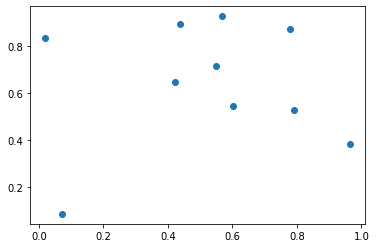

In [4]:
X, Y = pts.T
plt.scatter(X,Y)

In [5]:
def euc_dist(p1, p2):
    return np.sqrt( (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )

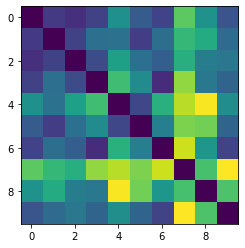

In [6]:

distances = np.zeros((N,N))

for i, p1 in enumerate(pts):
    for j,p2 in enumerate(pts):
        distances[i, j] = euc_dist(p1, p2)

plt.imshow(distances)

In [7]:
sorted_distance_idx = np.zeros((N,N), dtype="int8")

visited = []
for i, p1 in enumerate(pts):
    sorted_distance_idx[i] = np.argsort(distances[i])

sorted_distance_idx

array([[0, 2, 1, 3, 6, 9, 5, 4, 8, 7],
       [1, 0, 5, 2, 9, 6, 3, 4, 8, 7],
       [2, 0, 1, 3, 6, 5, 9, 8, 4, 7],
       [3, 6, 0, 2, 9, 1, 8, 5, 4, 7],
       [4, 5, 1, 9, 0, 2, 6, 3, 7, 8],
       [5, 1, 4, 0, 9, 2, 6, 3, 8, 7],
       [6, 3, 0, 9, 2, 1, 5, 8, 4, 7],
       [7, 2, 1, 8, 0, 5, 3, 4, 6, 9],
       [8, 3, 2, 0, 6, 1, 7, 9, 5, 4],
       [9, 6, 0, 3, 5, 1, 2, 4, 8, 7]], dtype=int8)

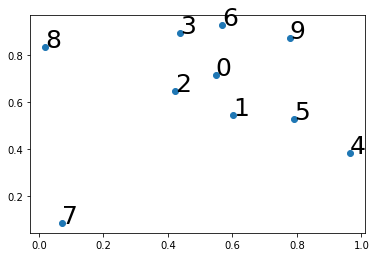

In [8]:
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()

In [9]:
visited = []
start = 7
current = start
while len(visited) != N:
    visited.append(current)
    for pt in sorted_distance_idx[current]:
        if pt not in visited:
            current = pt
            break

print(visited)
    

[7, 2, 0, 1, 5, 4, 9, 6, 3, 8]


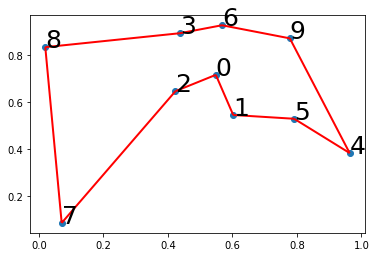

In [10]:
def plotlines(visited):
    pairs=[]
    for i in range(N-1):
        pair = (pts[visited[i]], pts[visited[i+1]])
        pairs.append(pair)
    pairs.append((pts[visited[0]], pts[visited[-1]]))
    return np.array(pairs)


pairs = plotlines(visited)

lc = mc.LineCollection(pairs, color="r", linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()

In [11]:
tot_dist = 0
for pair in pairs:
    tot_dist += euc_dist(*pair)
tot_dist

3.4388850126686448

In [12]:
def distance(start, sorted_distance_idx):
    visited = []
    current = start
    while len(visited) != N:
        visited.append(current)
        for pt in sorted_distance_idx[current]:
            if pt not in visited:
                current = pt
                break
    pairs=[]
    for i in range(N-1):
        pair = (pts[visited[i]], pts[visited[i+1]])
        pairs.append(pair)
    pairs.append((pts[visited[0]], pts[visited[-1]]))
    pairs = np.array(pairs)
    tot_dist = 0
    for pair in pairs:
        tot_dist += euc_dist(*pair)
    return pairs, tot_dist

Text(0.5, 1.0, 'Total distance: 3.439 \n Best starting point: 2')

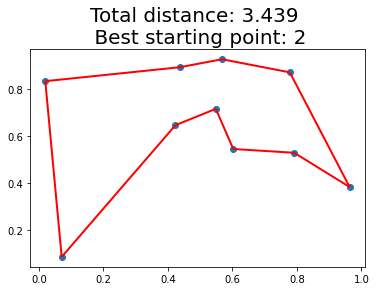

In [13]:
best_start = [np.inf, 0]
for start in range(N):
    dist = distance(start, sorted_distance_idx)[1]
    if dist < best_start[0]:
        best_start[0] = dist
        best_start[1] = start


pairs = distance(best_start[1], sorted_distance_idx)        

lc = mc.LineCollection(pairs[0], color="r", linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.scatter(X,Y)
plt.title(f"Total distance: {pairs[1]:.3f} \n Best starting point: {best_start[1]}", fontsize=20)
#for i, pt in enumerate(pts):
#    plt.text(pt[0], pt[1], i, fontsize=20)
